In [98]:
import albumentations as A
import cv2

image = cv2.imread("C:/Users/DL/Documents/content-original-championillustrations-group-slashes.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

label = "C:/Users/DL/Documents/content-original-championillustrations-group-slashes.xml"

transform = A.Compose([
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=1.0),
    A.HorizontalFlip(p=0.5),
    A.RandomRotate90(),
], bbox_params=A.BboxParams(format='pascal_voc'))

In [103]:
import xml.etree.ElementTree as ET

def read_content(xml_file: str):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    list_with_all = []
    for boxes in root.iter('object'):
        ymin, xmin, ymax, xmax, label = None, None, None, None, None
        ymin = int(boxes.find("bndbox/ymin").text)
        xmin = int(boxes.find("bndbox/xmin").text)
        ymax = int(boxes.find("bndbox/ymax").text)
        xmax = int(boxes.find("bndbox/xmax").text)
        label = str(boxes.find("name").text)
        list_with_single = [xmin, ymin, xmax, ymax, label]
        list_with_all.append(list_with_single)
    return list_with_all

bboxes = read_content(label)

label


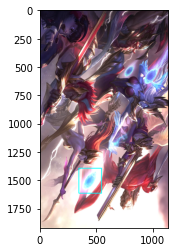

In [115]:
import matplotlib.pyplot as plt
transformed = transform(image=image, bboxes=bboxes)
transformed_image = transformed["image"]
transformed_bboxes = transformed["bboxes"]
for i in range(len(transformed_bboxes)):
    x_min = int(transformed_bboxes[i][0])
    y_min = int(transformed_bboxes[i][1])
    x_max = int(transformed_bboxes[i][2])
    y_max = int(transformed_bboxes[i][3])
    cv2.rectangle(transformed_image, (x_min, y_min), (x_max, y_max), [0, 255, 255], thickness=5)
    print(transformed_bboxes[i][4])
plt.imshow(transformed_image)